In [133]:
import pandas as pd

data = pd.read_csv('../data/U4_04_train.csv')

In [134]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [135]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

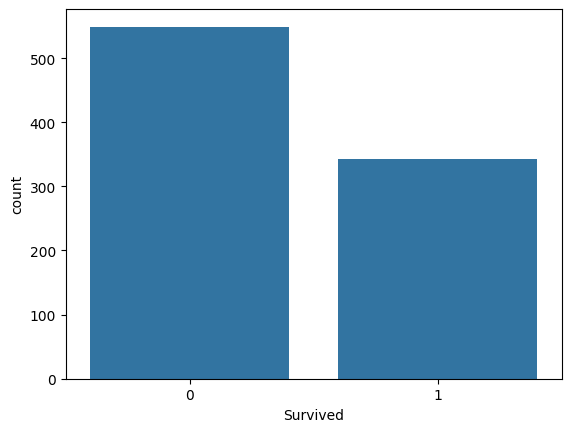

In [136]:
import seaborn as sb
sb.countplot(x="Survived", data=data)

<Axes: xlabel='Survived', ylabel='count'>

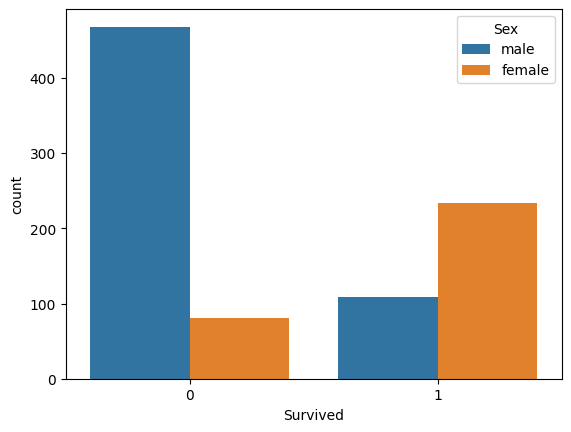

In [137]:
sb.countplot(x="Survived", data=data, hue="Sex")

In [138]:
# Validate null or empty data in columns
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

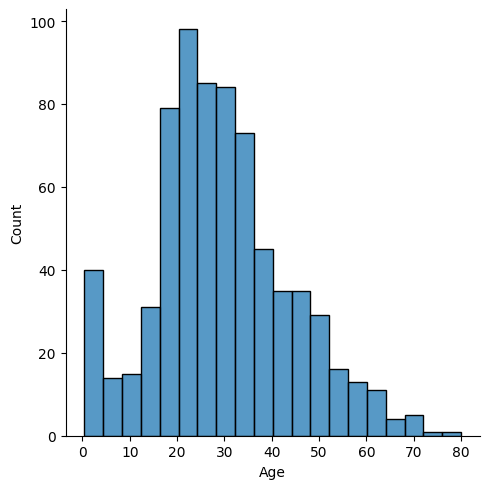

In [139]:
sb.displot(x="Age", data=data)

In [140]:
data["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [141]:
# Average
data["Age"].mean()

29.69911764705882

In [142]:
data["Age"] = data["Age"].fillna(data["Age"].mean())

In [143]:
data["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [144]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [145]:
# Remove Cabin columnd
data = data.drop(["Cabin"], axis=1)

In [146]:
data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [147]:
#Remove empty Embarked rows
data = data.dropna()

In [148]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [149]:
# Remove innecesary columns
data = data.drop(["Name", "PassengerId", "Ticket"], axis=1)

In [150]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [161]:
# transform Sex data
dummies_sex = pd.get_dummies(data["Sex"], drop_first=True)
dummies_sex.rename(columns={'male': 'Male'}, inplace=True)
dummies_sex
# dummies_sex.head()
#drop_first=True additionally avoid redundancy and concept "multicollinearity":
# model find correlations where it hasn't between Female and Male and the model concentrate in trainig this part

,Male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [162]:
#Add new Male column
data = data.join(dummies_sex)
data = data.drop(["Sex"], axis=1)

In [163]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Male
0,0,3,22.0,1,0,7.2500,S,True
1,1,1,38.0,1,0,71.2833,C,False
2,1,3,26.0,0,0,7.9250,S,False
3,1,1,35.0,1,0,53.1000,S,False
4,0,3,35.0,0,0,8.0500,S,True


<Axes: xlabel='Survived', ylabel='count'>

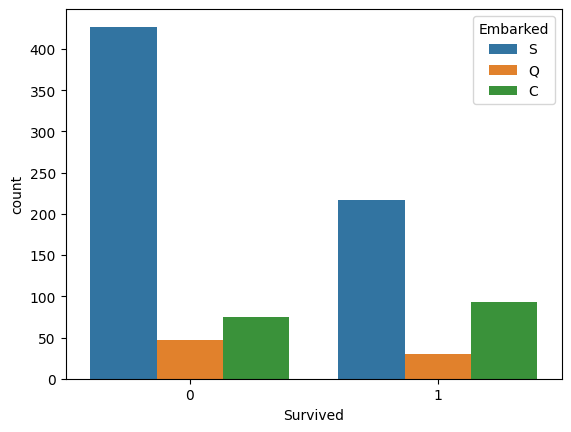

In [164]:
sb.countplot(x="Survived", data=data, hue="Embarked")

In [165]:
dummies_embarked = pd.get_dummies(data["Embarked"], drop_first=True)

In [166]:
data = data.join(dummies_embarked)
data = data.drop(["Embarked"], axis=1)

# When is Q is True o -> 1
# When is S is True o -> 1
# When is C is Q and S False -> 0

In [167]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


<Axes: >

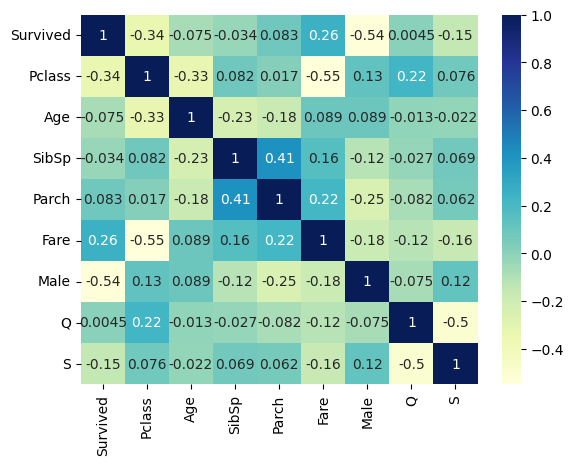

In [168]:
sb.heatmap(data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

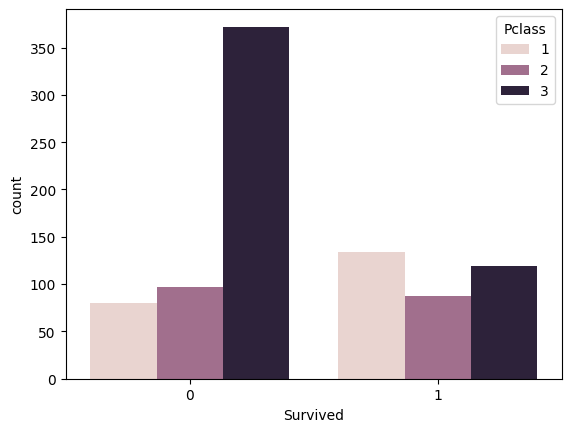

In [169]:
sb.countplot(x="Survived", data=data, hue="Pclass")

In [170]:
X = data.drop(["Survived"], axis=1)
y = data["Survived"]

In [171]:
X
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [172]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [173]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000) # Quantity of data iterations trying to adjust to better data  
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [174]:
predictions = model.predict(X_test)

In [175]:
from sklearn.metrics import accuracy_score
# Validate the model with the accuracy
accuracy_score(y_test, predictions)

0.8314606741573034

In [177]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       116
           1       0.80      0.69      0.74        62

    accuracy                           0.83       178
   macro avg       0.82      0.80      0.81       178
weighted avg       0.83      0.83      0.83       178



In [178]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, predictions)

In [179]:
pd.DataFrame(conf_matrix, columns=["Pred: No", "Pred: Yes"], index=["Real: No", "Real: Yes"])

,Pred: No,Pred: Si
Real: No,105,11
Real: Si,19,43


In [180]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Male,Q,S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [210]:
new_person = [3, 35, 0, 0, 10, 1, 0, 0]

new_prediction = model.predict([new_person])
if new_prediction[0] == 1:
    print("You survived")
else:
    print("No Survived")

No Survived


/Users/sancalle/repos/personal/introduction_ai_python/.venv/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
